In [1]:
!pip install datasets transformers
!pip install fvcore
!pip install -U zetascale

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.4 MB

In [1]:
!apt-get install git-lfs
!git lfs install
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datasets/allenai/c4
%cd c4
!git lfs pull --include "en/c4-train.00000-of-01024.json.gz"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Git LFS initialized.
Cloning into 'c4'...
remote: Enumerating objects: 87108, done.
remote: Total 87108 (delta 0), reused 0 (delta 0), pack-reused 87108 (from 1)
Receiving objects: 100% (87108/87108), 12.30 MiB | 7.88 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (69221/69221), done.
/content/c4


In [2]:
from datasets import load_dataset

from transformers import T5TokenizerFast, T5Tokenizer

import gzip
import json

def load_json_gz(filepath):
    with gzip.open(filepath, 'rb') as f:
        for line in f:
            yield json.loads(line)

# Load the small subset you downloaded
dataset_path = 'en/c4-train.00000-of-01024.json.gz'
data = list(load_json_gz(dataset_path))

# Preview a few examples
print(data[:2])

# Load the fast version of the T5 tokenizer
#tokenizer = T5TokenizerFast.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained('t5-small', use_fast=True)
# Load the C4 dataset
tokenized_data = [tokenizer.encode(d['text'], return_tensors='pt') for d in data[:100]]

#tokenized_data.set_format(type="torch", columns=["input_ids"])

[{'text': 'Beginners BBQ Class Taking Place in Missoula!\nDo you want to get better at making delicious BBQ? You will have the opportunity, put this on your calendar now. Thursday, September 22nd join World Class BBQ Champion, Tony Balay from Lonestar Smoke Rangers. He will be teaching a beginner level class for everyone who wants to get better with their culinary skills.\nHe will teach you everything you need to know to compete in a KCBS BBQ competition, including techniques, recipes, timelines, meat selection and trimming, plus smoker and fire information.\nThe cost to be in the class is $35 per person, and for spectators it is free. Included in the cost will be either a t-shirt or apron and you will be tasting samples of each meat that is prepared.', 'timestamp': '2019-04-25T12:57:54Z', 'url': 'https://klyq.com/beginners-bbq-class-taking-place-in-missoula/'}, {'text': 'Discussion in \'Mac OS X Lion (10.7)\' started by axboi87, Jan 20, 2012.\nI\'ve got a 500gb internal drive and a 24

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Token indices sequence length is longer than the specified maximum sequence length for this model (2600 > 512). Running this sequence through the model will result in indexing errors


Energy for expert  0 40.25
Flops for expert layer  0 26.080182272
Energy for expert  1 43.4
Flops for expert layer  1 26.080182272
Energy for expert  2 29.89
Flops for expert layer  2 26.080182272
Energy for expert  3 48.14
Flops for expert layer  3 26.080182272
Energy for expert  4 50.89
Flops for expert layer  4 26.080182272
Energy for expert  5 38.93
Flops for expert layer  5 26.080182272


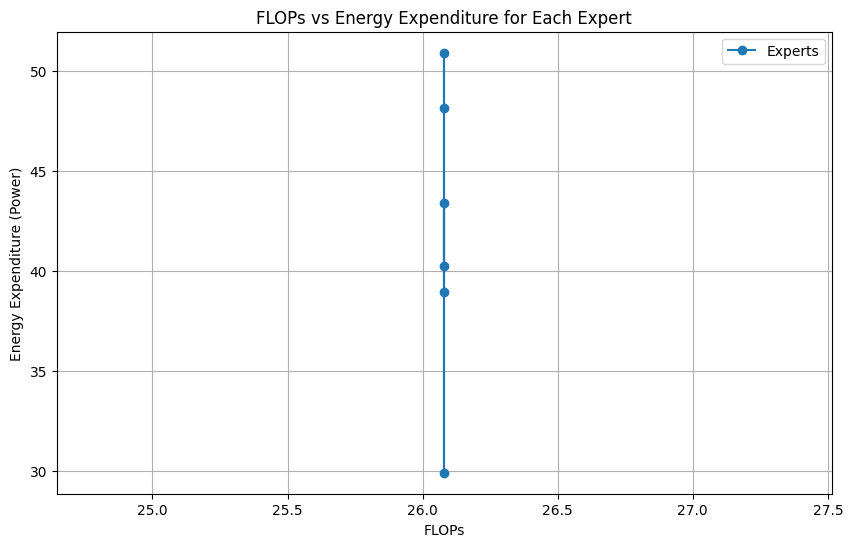

Energy for expert  0 95.19
Flops for expert layer  0 26.080182272
Energy for expert  1 39.21
Flops for expert layer  1 26.080182272
Energy for expert  2 40.27
Flops for expert layer  2 26.080182272
Energy for expert  3 32.05
Flops for expert layer  3 26.080182272
Energy for expert  4 45.445
Flops for expert layer  4 26.080182272
Energy for expert  5 44.805
Flops for expert layer  5 26.080182272


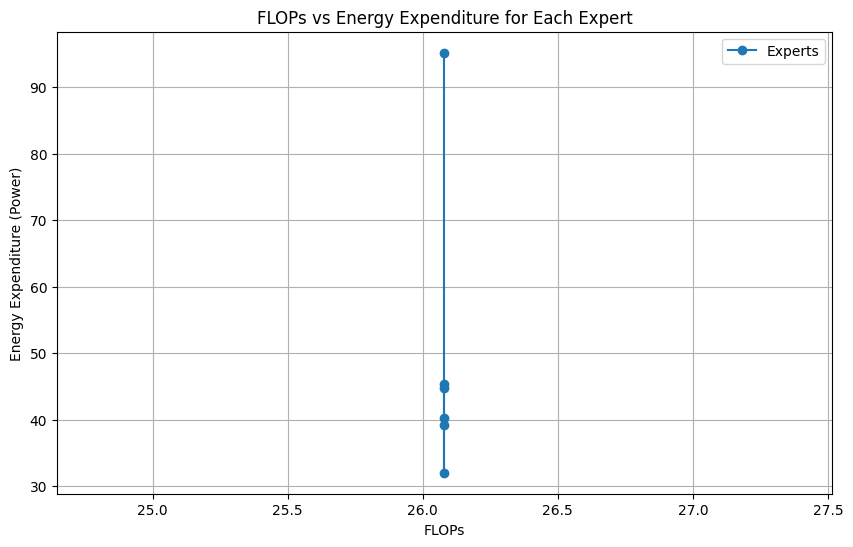

Energy for expert  0 60.28
Flops for expert layer  0 26.080182272
Energy for expert  1 85.49
Flops for expert layer  1 26.080182272
Energy for expert  2 91.96
Flops for expert layer  2 26.080182272
Energy for expert  3 40.07
Flops for expert layer  3 26.080182272
Energy for expert  4 31.85
Flops for expert layer  4 26.080182272
Energy for expert  5 31.45
Flops for expert layer  5 26.080182272


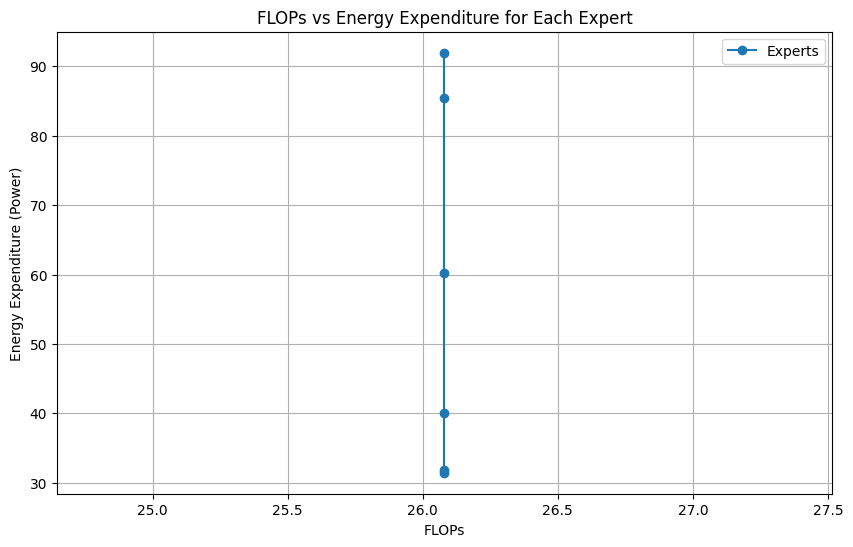

Epoch 1/5, Loss: 24.055593808492024
Energy for expert  0 62.48
Flops for expert layer  0 26.080182272
Energy for expert  1 40.27
Flops for expert layer  1 26.080182272
Energy for expert  2 53.42
Flops for expert layer  2 26.080182272
Energy for expert  3 89.44
Flops for expert layer  3 26.080182272
Energy for expert  4 31.26
Flops for expert layer  4 26.080182272
Energy for expert  5 30.88
Flops for expert layer  5 26.080182272


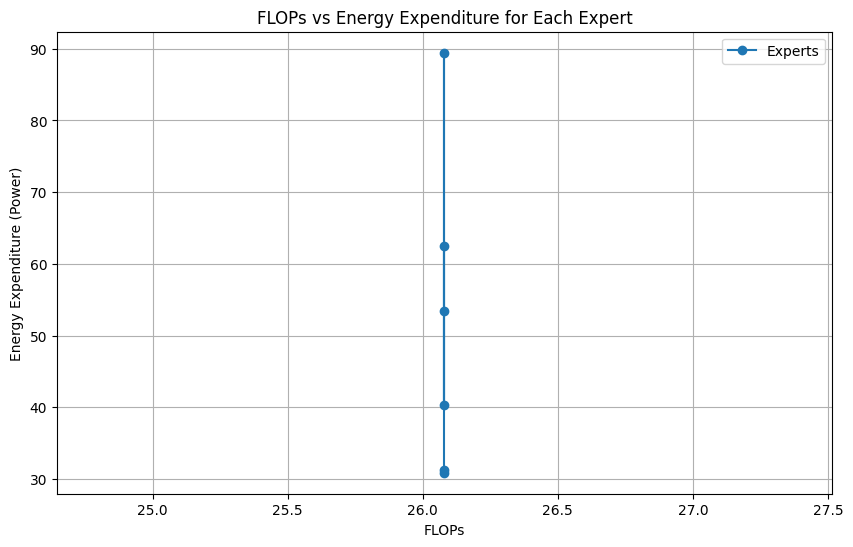

Energy for expert  0 55.8
Flops for expert layer  0 26.080182272
Energy for expert  1 40.47
Flops for expert layer  1 26.080182272
Energy for expert  2 51.325
Flops for expert layer  2 26.080182272
Energy for expert  3 42.03
Flops for expert layer  3 26.080182272
Energy for expert  4 50.99
Flops for expert layer  4 26.080182272
Energy for expert  5 30.27
Flops for expert layer  5 26.080182272


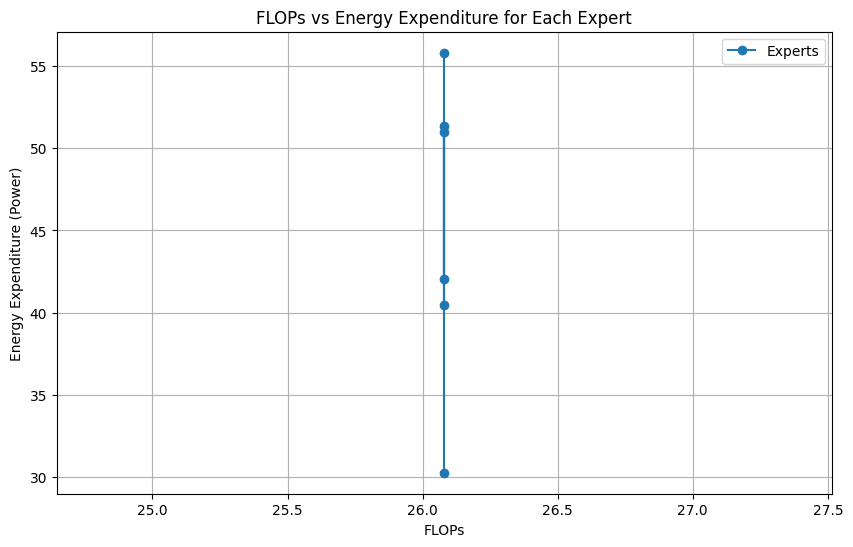

Energy for expert  0 41.45
Flops for expert layer  0 26.080182272
Energy for expert  1 52.41
Flops for expert layer  1 26.080182272
Energy for expert  2 62.44
Flops for expert layer  2 26.080182272
Energy for expert  3 51.38
Flops for expert layer  3 26.080182272
Energy for expert  4 40.42
Flops for expert layer  4 26.080182272
Energy for expert  5 30.78
Flops for expert layer  5 26.080182272


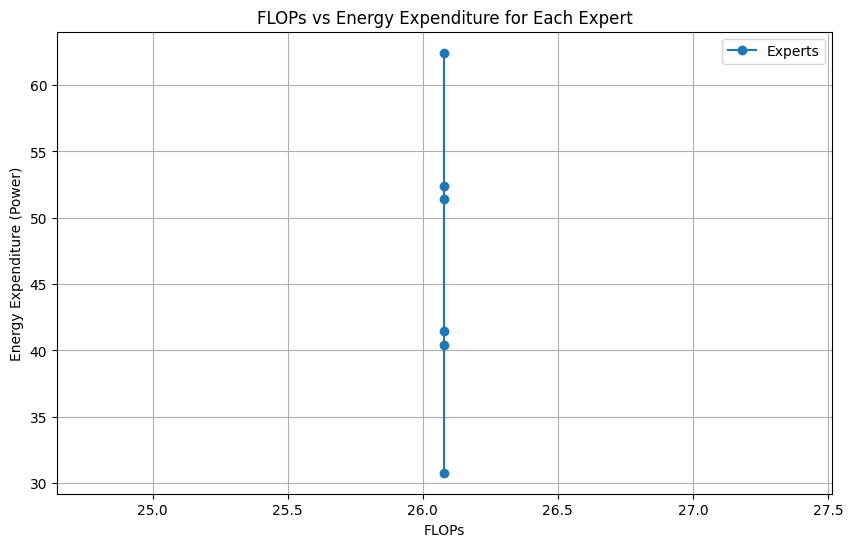

Epoch 2/5, Loss: 12.563168207804361
Energy for expert  0 37.83
Flops for expert layer  0 26.080182272
Energy for expert  1 53.870000000000005
Flops for expert layer  1 26.080182272
Energy for expert  2 45.685
Flops for expert layer  2 26.080182272
Energy for expert  3 90.44
Flops for expert layer  3 26.080182272
Energy for expert  4 56.13
Flops for expert layer  4 26.080182272
Energy for expert  5 31.55
Flops for expert layer  5 26.080182272


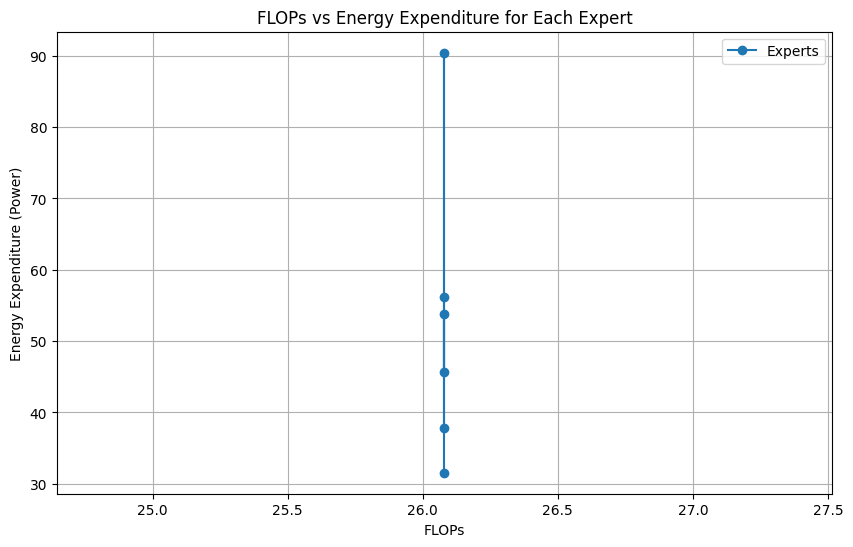

Energy for expert  0 68.88
Flops for expert layer  0 26.080182272
Energy for expert  1 100.73
Flops for expert layer  1 26.080182272
Energy for expert  2 40.76
Flops for expert layer  2 26.080182272
Energy for expert  3 40.86
Flops for expert layer  3 26.080182272
Energy for expert  4 32.24
Flops for expert layer  4 26.080182272
Energy for expert  5 56.03
Flops for expert layer  5 26.080182272


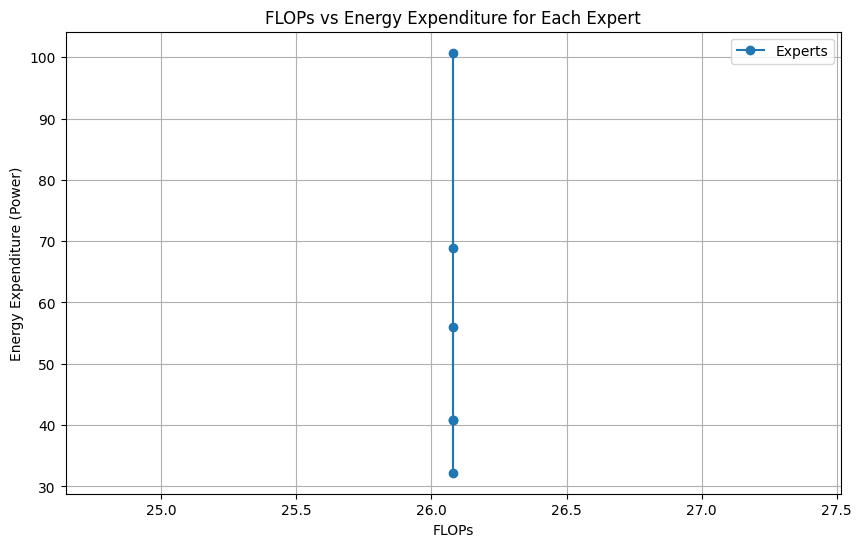

Energy for expert  0 41.26
Flops for expert layer  0 26.080182272
Energy for expert  1 55.974999999999994
Flops for expert layer  1 26.080182272
Energy for expert  2 40.94
Flops for expert layer  2 26.080182272
Energy for expert  3 48.055
Flops for expert layer  3 26.080182272
Energy for expert  4 33.504999999999995
Flops for expert layer  4 26.080182272
Energy for expert  5 30.68
Flops for expert layer  5 26.080182272


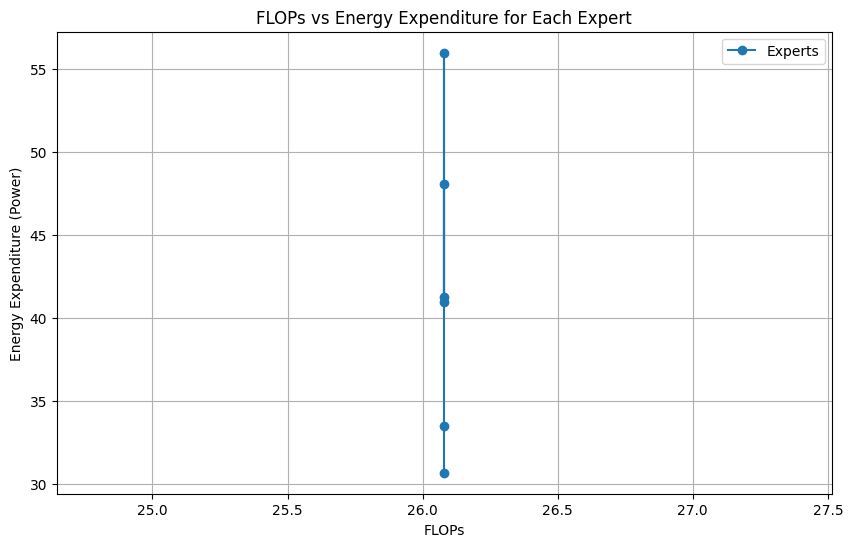

Epoch 3/5, Loss: 10.225152651468912
Energy for expert  0 37.24
Flops for expert layer  0 26.080182272
Energy for expert  1 37.14
Flops for expert layer  1 26.080182272
Energy for expert  2 37.24
Flops for expert layer  2 26.080182272
Energy for expert  3 53.155
Flops for expert layer  3 26.080182272
Energy for expert  4 33.9
Flops for expert layer  4 26.080182272
Energy for expert  5 31.35
Flops for expert layer  5 26.080182272


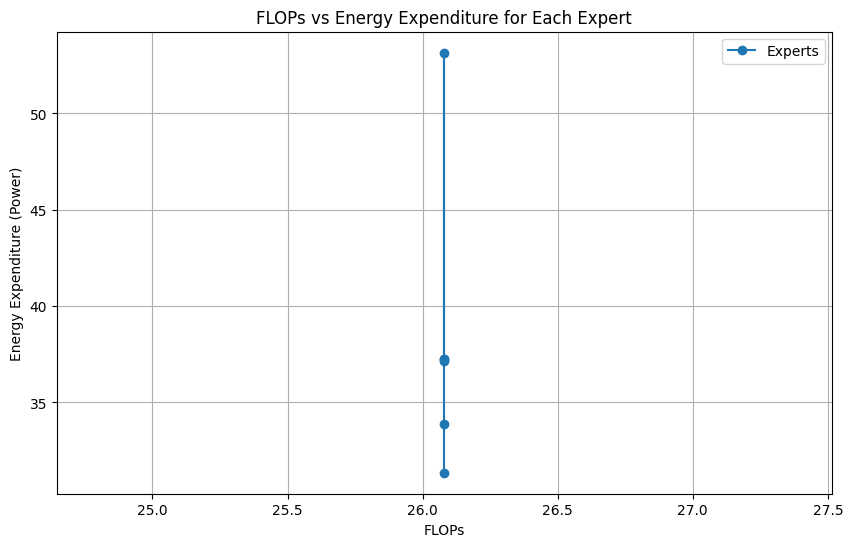

Energy for expert  0 41.55
Flops for expert layer  0 26.080182272
Energy for expert  1 55.739999999999995
Flops for expert layer  1 26.080182272
Energy for expert  2 57.545
Flops for expert layer  2 26.080182272
Energy for expert  3 87.13
Flops for expert layer  3 26.080182272
Energy for expert  4 36.55
Flops for expert layer  4 26.080182272
Energy for expert  5 32.05
Flops for expert layer  5 26.080182272


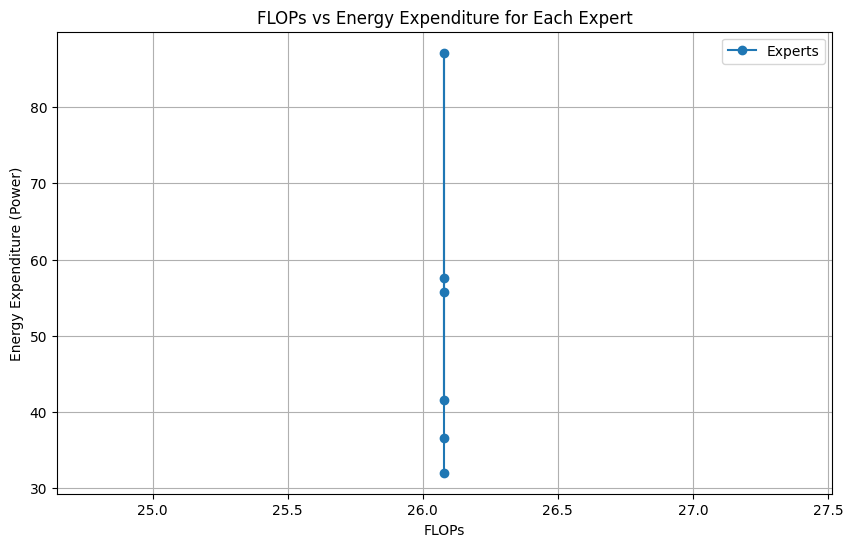

Energy for expert  0 78.03
Flops for expert layer  0 26.080182272
Energy for expert  1 99.86
Flops for expert layer  1 26.080182272
Energy for expert  2 58.42
Flops for expert layer  2 26.080182272
Energy for expert  3 41.82
Flops for expert layer  3 26.080182272
Energy for expert  4 33.03
Flops for expert layer  4 26.080182272
Energy for expert  5 44.465
Flops for expert layer  5 26.080182272


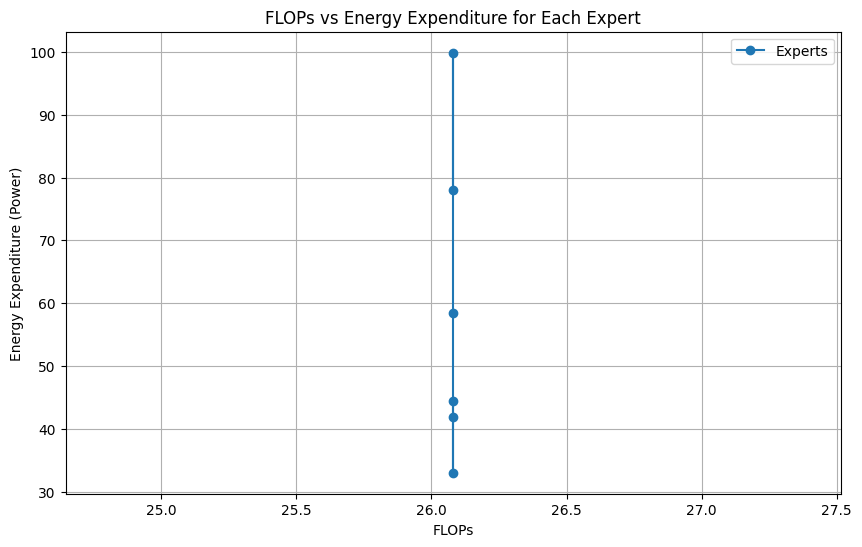

Epoch 4/5, Loss: 9.827740987141928
Energy for expert  0 41.13
Flops for expert layer  0 26.080182272
Energy for expert  1 57.410000000000004
Flops for expert layer  1 26.080182272
Energy for expert  2 42.09
Flops for expert layer  2 26.080182272
Energy for expert  3 54.59
Flops for expert layer  3 26.080182272
Energy for expert  4 41.82
Flops for expert layer  4 26.080182272
Energy for expert  5 31.06
Flops for expert layer  5 26.080182272


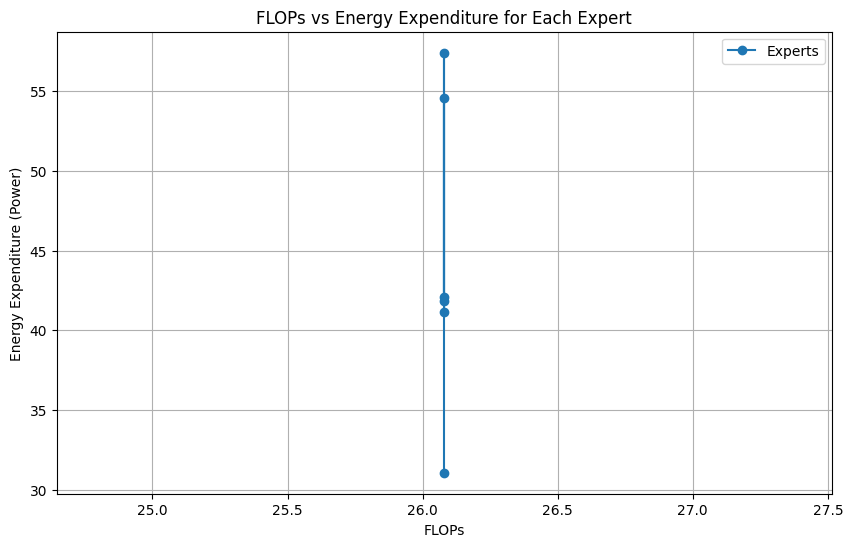

Energy for expert  0 49.370000000000005
Flops for expert layer  0 26.080182272
Energy for expert  1 100.54
Flops for expert layer  1 26.080182272
Energy for expert  2 74.55
Flops for expert layer  2 26.080182272
Energy for expert  3 42.12
Flops for expert layer  3 26.080182272
Energy for expert  4 48.03
Flops for expert layer  4 26.080182272
Energy for expert  5 51.94
Flops for expert layer  5 26.080182272


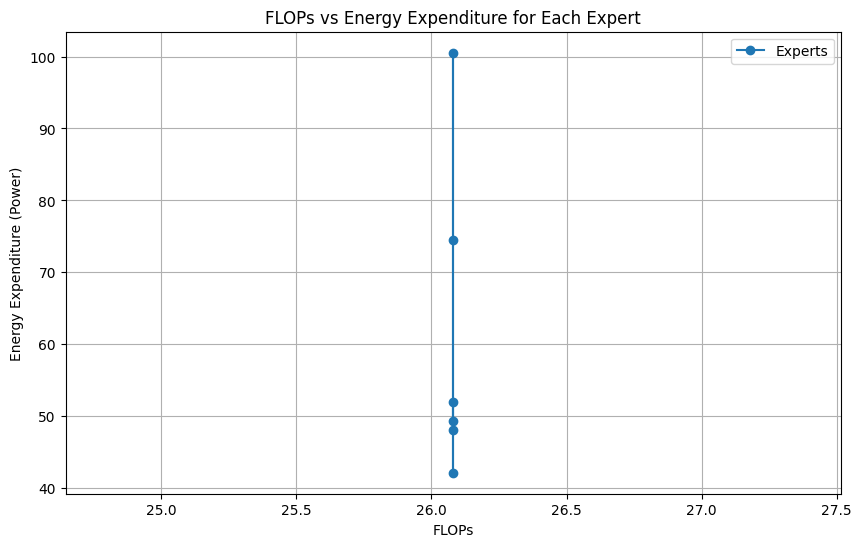

Energy for expert  0 43.0
Flops for expert layer  0 26.080182272
Energy for expert  1 42.51
Flops for expert layer  1 26.080182272
Energy for expert  2 59.32
Flops for expert layer  2 26.080182272
Energy for expert  3 85.35
Flops for expert layer  3 26.080182272
Energy for expert  4 53.51
Flops for expert layer  4 26.080182272
Energy for expert  5 32.64
Flops for expert layer  5 26.080182272


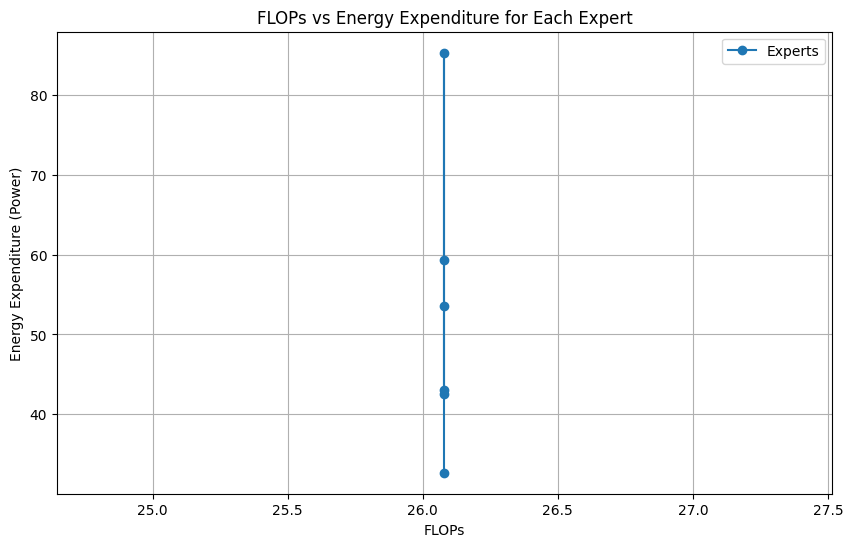

Epoch 5/5, Loss: 8.68878968556722


In [4]:
import torch
import torch.nn.functional as F
from torch import Tensor, nn
from zeta.nn import FeedForward, MultiQueryAttention
import torch.optim as optim
from torch.utils.data import DataLoader
import subprocess
import time
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from fvcore.nn import FlopCountAnalysis, flop_count
import random

class DepthGate(nn.Module):
    def __init__(self, dim: int, max_depth: int):
        super().__init__()
        self.dim = dim
        self.max_depth = max_depth
        self.gate = nn.Linear(dim, max_depth)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        gate_scores = F.softmax(self.gate(x), dim=-1)
        return gate_scores

class TransformerLayer(nn.Module):
    def __init__(self, dim: int, num_heads: int, ff_hidden_dim: int):
        super().__init__()
        self.attention = nn.MultiheadAttention(dim, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(dim, ff_hidden_dim),
            nn.ReLU(),
            nn.Linear(ff_hidden_dim, dim)
        )
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        attn_output, _ = self.attention(x, x, x)
        x = self.norm1(x + attn_output)
        ff_output = self.feed_forward(x)
        x = self.norm2(x + ff_output)
        return x

class MixtureOfDepthsTransformer(nn.Module):
    def __init__(self, num_tokens: int, dim: int, max_depth: int, num_heads: int, ff_hidden_dim: int, top_k: int):
        super().__init__()
        self.embedding = nn.Embedding(num_tokens, dim)
        self.max_depth = max_depth
        self.top_k = top_k
        self.depth_gate = DepthGate(dim, max_depth)
        self.layers = nn.ModuleList([TransformerLayer(dim, num_heads, ff_hidden_dim) for _ in range(max_depth)])
        self.fc_out = nn.Linear(dim, num_tokens)
        self.dim=dim
        self.flops_per_expert = []
        self.energy_per_expert = []

    def add_noise_to_embeddings(embeddings, noise_factor=0.1):
      noise = torch.randn_like(embeddings) * noise_factor
      return embeddings + noise

    def get_gpu_power(self):
        # Use nvidia-smi to get the current power draw (in watts)
        try:
            power_info = subprocess.check_output(['nvidia-smi', '--query-gpu=power.draw', '--format=csv,noheader,nounits'])
            power_draw = float(power_info.strip())  # Power in watts (W)
            return power_draw
        except Exception as e:
            print("Error getting GPU power:", e)
            return 0
    def plot_flops_vs_energy(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.flops_per_expert, self.energy_per_expert, 'o-', label="Experts")
        plt.xlabel("FLOPs")
        plt.ylabel("Energy Expenditure (Power)")
        plt.title("FLOPs vs Energy Expenditure for Each Expert")
        plt.legend()
        plt.grid(True)
        plt.show()


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        #print(x)
        # for i in range(x.size(0)):
        #      input_text = tokenizer.decode(inputs[i].tolist(), skip_special_tokens=True)
        #      print(f"Input Text: {input_text}")
        x = self.embedding(x)

        gate_scores = self.depth_gate(x)  # Shape: (batch_size, seq_len, max_depth)
        batch_size, seq_len, _ = x.size()

        # Initialize output tensor
        output = torch.zeros_like(x)
        # mask_total = torch.zeros(batch_size, seq_len, device=x.device)
        mask_total = torch.zeros(batch_size, seq_len, dtype=torch.bool, device=x.device)  # Use boolean mask
        all_tokens = x.clone()

        self.flops_per_expert.clear()
        self.energy_per_expert.clear()


        # Iterate through each depth (layer)
        for i in range(self.max_depth):
            # Get the top-K tokens for the current depth layer
            weights = gate_scores[:, :, i].unsqueeze(-1).expand(-1, -1, self.dim)
            weighted_scores = all_tokens*weights
            masked_scores = weighted_scores * (~mask_total).float().unsqueeze(-1)
            top_k_values, top_k_indices = masked_scores.topk(self.top_k, dim=-1, largest=True, sorted=False)  # Shape: (batch_size, seq_len, top_k)

            # Create a mask for top-K indices
            #mask = torch.zeros(batch_size, seq_len,  device=x.device)
            mask = torch.zeros(batch_size, seq_len, dtype=torch.bool, device=x.device)
            for b in range(batch_size):
                for s in range(seq_len):
                    mask[b, s] = torch.any(top_k_indices[b, s] == i)
            mask_total = mask_total | mask

            #mask = mask.unsqueeze(-1).expand(-1, -1, self.dim)
            masked_x = x * mask.unsqueeze(-1)
            #top_k_weights = gate_scores[:, :, i].unsqueeze(-1).expand(-1, -1, self.dim)
            #masked_x = x * mask
            weighted_x = masked_x * masked_scores
            initial_power = self.get_gpu_power()

            layer_output = self.layers[i](weighted_x)
            flops,_ = flop_count(self.layers[i],(weighted_x,))
            expert_flops = sum(flops.values())
            initial_power = self.get_gpu_power()
            layer_output = self.layers[i](weighted_x)
            final_power = self.get_gpu_power()
            avg_power = (initial_power + final_power) / 2
            print("Energy for expert ", i, avg_power)
            print("Flops for expert layer ", i, expert_flops)
            self.flops_per_expert.append(expert_flops)
            self.energy_per_expert.append(avg_power)
            output += layer_output
            #output = layer_output + x * (1 - mask)
            #x = output
            x = output * (~mask_total).unsqueeze(-1)
        self.plot_flops_vs_energy()
        return self.fc_out(output)



def perturb_input(input_ids, tokenizer, noise_type="substitution", dropout_prob=0.1, substitution_prob=0.3):
    """
    Perturbs the input tokenized text by applying dropout or substitution noise.

    input_ids: Tensor of shape (batch_size, seq_len)
    tokenizer: The tokenizer used to encode text.
    noise_type: Type of noise ('dropout' or 'substitution')
    dropout_prob: Probability of dropping tokens.
    substitution_prob: Probability of substituting tokens with random tokens.
    """
    batch_size, seq_len = input_ids.size()

    if noise_type == "dropout":
        # Word Dropout: Randomly set some token indices to the pad token
        for i in range(batch_size):
            for j in range(seq_len):
                if random.random() < dropout_prob:
                    input_ids[i, j] = tokenizer.pad_token_id

    elif noise_type == "substitution":
        # Word Substitution: Replace tokens with random tokens from the vocabulary
        vocab_size = tokenizer.vocab_size
        for i in range(batch_size):
            for j in range(seq_len):
                if random.random() < substitution_prob:
                    random_token = random.randint(0, vocab_size - 1)
                    input_ids[i, j] = random_token

    return input_ids

# Create DataLoader with custom collate_fn
def collate_fn(batch):
    input_ids = [item[0] for item in batch]
    max_length = 256
    padded_inputs = torch.stack([
        torch.cat([seq, torch.full((max_length - seq.size(0),), tokenizer.pad_token_id)])
        if seq.size(0) < max_length else seq[:max_length]
        for seq in input_ids
    ], dim=0)
    return {'input_ids': padded_inputs}

# Create DataLoader
dataloader = DataLoader(tokenized_data, batch_size=32, shuffle=True, drop_last=True,collate_fn=collate_fn)


num_tokens = tokenizer.vocab_size
model = MixtureOfDepthsTransformer(num_tokens=num_tokens, dim=512, max_depth=6, num_heads=8, ff_hidden_dim=2048,top_k=5)


# Loss, optimizer, and training loop
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in dataloader:
        inputs = batch['input_ids'].to(device)
        #inputs = perturb_input(inputs.clone(), tokenizer, noise_type="substitution", substitution_prob=0.1)
        #print(inputs.shape)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)

        # The model's output is (batch_size, seq_length, num_tokens)
        # We need to shift targets for next-token prediction (e.g., language modeling)
        logits = outputs[:, :-1, :].contiguous()
        targets = inputs[:, 1:].contiguous()

        loss = criterion(logits.view(-1, num_tokens), targets.view(-1))

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        # Update total loss
        total_loss += loss.item()

        # for i in range(inputs.size(0)):
        #     input_text = tokenizer.decode(inputs[i].tolist(), skip_special_tokens=True)
        #     #print(f"Input Text: {input_text}")

        #     # Extract the most likely token indices for the output
        #     top_token_indices = outputs[i].argmax(dim=-1)  # Shape: [seq_length]
        #     output_text = tokenizer.decode(top_token_indices.tolist(), skip_special_tokens=True)
        #     #print(f"Output Text: {output_text}")

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss/len(dataloader)}")

    # Step the learning rate scheduler, if any
    scheduler.step()